# Goal

Given the data of a new passenger, we want to predict whether they will survive the disaster.

### Import necessary libraries


In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Load Data

In [140]:
train_df = pd.read_csv('../data/train.csv', index_col=0)
test_df = pd.read_csv('../data/test.csv',index_col=0)

In [141]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [142]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Make the column names lower case for consistency

In [143]:
train_df.columns= train_df.columns.str.lower()
test_df.columns= test_df.columns.str.lower()
test_df.columns 

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')

###  Split the data into training and testing set

In [144]:
df_train, df_test = train_test_split(train_df, test_size=0.2, random_state=101)

* There is an extra test data given by kaggle. We are now dealing only with the train data set which is splitted.

## EDA

### Check null values

In [145]:
print(df_train.isna().sum()), print(''.center(30,'*')), print(test_df.isna().sum())

survived      0
pclass        0
name          0
sex           0
age         135
sibsp         0
parch         0
ticket        0
fare          0
cabin       555
embarked      2
dtype: int64
******************************
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64


(None, None, None)

### Calculate the number of surviving/non-surviving passengers and visualize it

Text(0, 0.5, 'Count')

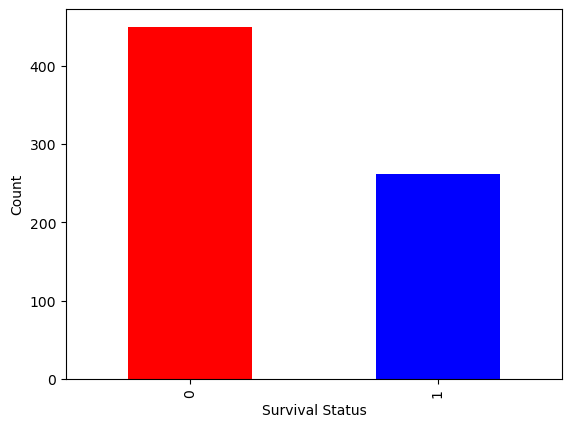

In [146]:
survived=df_train['survived'].value_counts()
survived.plot.bar(color=("red","blue"))
plt.xlabel("Survival Status")
plt.ylabel("Count")

### Calculate and visualize the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [147]:
first_class_survived_ratio = df_train[(df_train["pclass"]==1) & (df_train["survived"]==1)].shape[0] / df_train[df_train["pclass"]==1].shape[0]
print(first_class_survived_ratio)

0.608433734939759


### Plot passenger survival status by sex and passenger class


<AxesSubplot:xlabel='pclass,sex'>

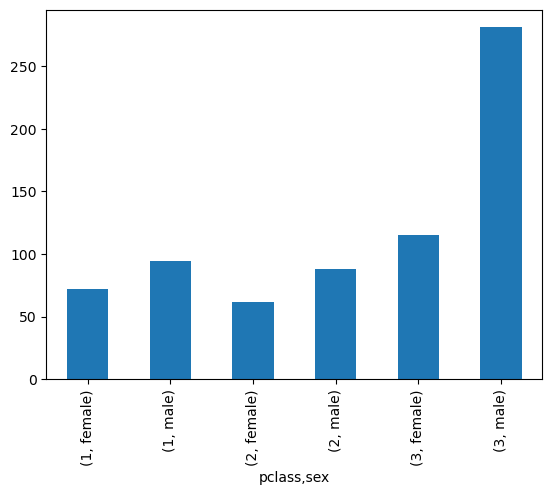

In [148]:
df_train.groupby(["pclass","sex"])["survived"].count().plot.bar(stacked=True)

### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:xlabel='age', ylabel='Count'>

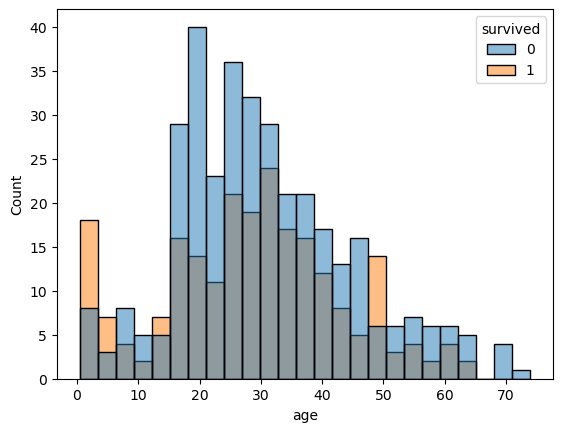

In [149]:
sns.histplot(data=df_train, x="age",  hue="survived", color={"blue"},bins=25)

### Inspect the possible correlations between features

<AxesSubplot:>

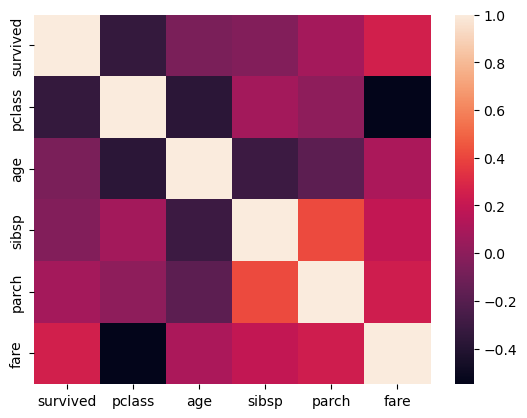

In [150]:
sns.heatmap(df_train.corr())

* Fare and pclass have strong anticorrelation, maybe dropping one, would improve the score: "Yes it does by 2 percent"

*You can further inspect data. Be creative ...*

## Feature Engineering with Pipeline

In [151]:
### check the null values once again

In [152]:
print(train_df.isna().sum()), print(''.center(30,'*')), print(test_df.isna().sum())

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64
******************************
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64


(None, None, None)

* The embarked one in the train data and the fare one in the test data, can be solved by a simpleimputer with 
strategies being most frequent and mean, respectively. 

### Handle missing ages based on titles

### Create new feature "title" extracted from name

In [153]:
df_train['title'] = df_train['name'].str.extract('([A-Za-z]+)\.',expand=True)
df_test['title'] = df_test['name'].str.extract('([A-Za-z]+)\.',expand=True)

### For every title and class calculate the mean age and use it to fill the emoty values

In [154]:

titles_mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss', 'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df_train.replace({'title': titles_mapping}, inplace=True)
df_test.replace({'title': titles_mapping}, inplace=True)
df_train["age"].fillna(df_train.groupby(["title", "pclass"])["age"].transform("mean"), inplace=True)
df_test["age"].fillna(df_test.groupby(["title", "pclass"])["age"].transform("mean"), inplace=True)

df_train['age'].isna().sum()

0

### Define the preprocessing steps for both numerical and categorical data.

In [155]:
# Train test split for the training based on only train.csv
y=df_train["survived"]
X=df_train.drop(["survived"], axis=1)
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)


In [156]:
### Create custom function

def name_length(a):
    length = a[a.columns[0]].str.len()
    return length.values.reshape(-1, 1)

In [166]:
num_pipe=make_pipeline(SimpleImputer(strategy="mean"), MinMaxScaler())
cat_pipe=make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
preprocessor=ColumnTransformer(    transformers=[
        ("num1", num_pipe, ["age"]),
        ("cat", cat_pipe, ['pclass', 'embarked', 'parch','sex']),
        ("name", FunctionTransformer(name_length), ['name']),
        ("do_nothing", 'passthrough', ['sibsp'])
    ])

In [167]:
# Define the model training pipeline

In [168]:
pipeline=make_pipeline(preprocessor, LogisticRegression())

## Train model

In [169]:
# fit the pipeline to training data
pipeline.fit(X_train, y_train)

/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'embarked',
                                                   'parch', 'sex']),
                                                 ('name',
                                                  FunctionTransformer(func=<function name_length at 0x7f8522cf0160>),
                                                  ['name']),
                                                 ('do_nothing', 'passthrough',
                                                  ['sibsp'])])),
                ('logisticregression', LogisticRegression())])

###  Make Predictions

In [170]:
y_pred = pipeline.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [171]:
# get prediction probabilities from the pipeline 
proba = pipeline.predict_proba(X_test)
proba

array([[0.91125146, 0.08874854],
       [0.34945768, 0.65054232],
       [0.93365308, 0.06634692],
       [0.08322846, 0.91677154],
       [0.94441407, 0.05558593],
       [0.10598424, 0.89401576],
       [0.2129144 , 0.7870856 ],
       [0.35964938, 0.64035062],
       [0.80056762, 0.19943238],
       [0.94171065, 0.05828935],
       [0.64057957, 0.35942043],
       [0.93076804, 0.06923196],
       [0.23413855, 0.76586145],
       [0.22960465, 0.77039535],
       [0.18498367, 0.81501633],
       [0.29566199, 0.70433801],
       [0.96425091, 0.03574909],
       [0.10420654, 0.89579346],
       [0.90020244, 0.09979756],
       [0.41372533, 0.58627467],
       [0.81594427, 0.18405573],
       [0.9317543 , 0.0682457 ],
       [0.87300461, 0.12699539],
       [0.57316386, 0.42683614],
       [0.11720742, 0.88279258],
       [0.93446398, 0.06553602],
       [0.90822006, 0.09177994],
       [0.40149319, 0.59850681],
       [0.67712945, 0.32287055],
       [0.61558245, 0.38441755],
       [0.

###  Optimize the model. this will include 



* Cross-validation
* Hyperparameter optimization
* Regularization

 *By doing so, the result radically improves. Please contact me for discussion: jebreiilkhadem3@gmail.com

###  Calculate Test Score

In [172]:
pipeline.score(X_train, y_train)

0.820738137082601

In [173]:
pipeline.score(X_test, y_test)

0.7972027972027972

In [174]:
accuracy_score(y_pred, y_test)

0.7972027972027972

In [175]:
accuracy_score(y_pred, y_test), precision_score(y_test, y_pred, pos_label=1), recall_score(y_test, y_pred, pos_label=1), f1_score(y_test, y_pred, pos_label=1)

(0.7972027972027972,
 0.8604651162790697,
 0.6166666666666667,
 0.7184466019417476)

 ### Submit to Kaggle

In [76]:
# First prepare data:
test_df['title'] = test_df['name'].str.extract('([A-Za-z]+)\.',expand=True)
test_df.replace({'title': titles_mapping}, inplace=True)
test_df["age"].fillna(test_df.groupby(["title", "pclass"])["age"].transform("mean"), inplace=True)

In [80]:
My={"PassengerId": test_df.index.to_numpy(),"Survived": pipeline.predict(test_df)}
My_prediction=pd.DataFrame(data=My)
My_prediction.set_index("PassengerId", inplace=True)
My_prediction.to_csv("out.csv")
My_prediction

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
